# DeepLearning Assessment 1 - Mathematical Symbol Classification
This notebook performs multiclass classification of handwritten mathematical symbols. The notebook outlines two classifiers namely:

* Support Vector Machine (SVM)  
* Artificial Neural Network (ANN)  

For both classifiers, the handwritten symbols will be passed in three various forms:

* The raw pixel form  
* Histogram Of Gradient (HoG) features  
* Local Binary Patterns (LBP) features.


# Data Loading

In [1]:

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
import os
import cv2
#

def data_loader(Dataset_Path):
    images = []
    labels = []
    label_map = {}
    if not os.path.exists(Dataset_Path):
        raise FileNotFoundError(f"The directory {Dataset_Path} does not exist.")
    #Loop through the data directory and return each photo as a tensor and attach a class label
    for label, folder in enumerate(sorted(os.listdir(Dataset_Path))):  
        folder_path = os.path.join(Dataset_Path, folder)
        label_map[label]= folder
        #Loop through one class folder and load images as grayscale
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64,64))
            labels.append(label)
            images.append(image)


    return images, labels, label_map



In [119]:
%pwd

'c:\\Users\\61422\\OneDrive\\Desktop\\Augustus Amedume Comp Sci Degree\\Augustus Amedume Year 3 Computer Science\\Semester 1\\Deep Learning And Convolutional Nueral Networks\\DeepLearningAssignment1'

In [6]:
images, labels, label_map = data_loader('data')

In [7]:
label_map[0] = "Exclamation (!)"
label_map[1] = "Left Parantheses"
label_map[2] = "Right Parenthese"
label_map[3] = "Zero"
label_map[4] = "Seven"
label_map[5] = "Nine"
label_map[6]= "Not Equal"


In [8]:
label_map

{0: 'Exclamation (!)',
 1: 'Left Parantheses',
 2: 'Right Parenthese',
 3: 'Zero',
 4: 'Seven',
 5: 'Nine',
 6: 'Not Equal',
 7: 'sin',
 8: 'sum',
 9: 'times'}

In [9]:
for id, image in enumerate(images):
    print(f"{id}, {image}")

0, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
1, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
2, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
3, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
4, [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
5, [[255 255 255 ... 255 

In [10]:
images

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

## Data Visualisation

In [11]:
import matplotlib.pyplot as plt



def visualise_few_images_per_class(img_array, labels, label_map, num_images_visualised_per_class=1,):
    #Set the size of the visualisation
    plt.figure(figsize=(10,10))
    labels = np.atleast_1d(labels)
    #get random indexes for the images in the image array based on their class value
    for classLabel, class_name in label_map.items():
        class_indices = np.where(labels == classLabel)[0]
        selected_indices = np.random.choice(class_indices,num_images_visualised_per_class,replace=False)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(label_map), num_images_visualised_per_class, classLabel * num_images_visualised_per_class + i + 1)
            plt.imshow(img_array[idx], cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

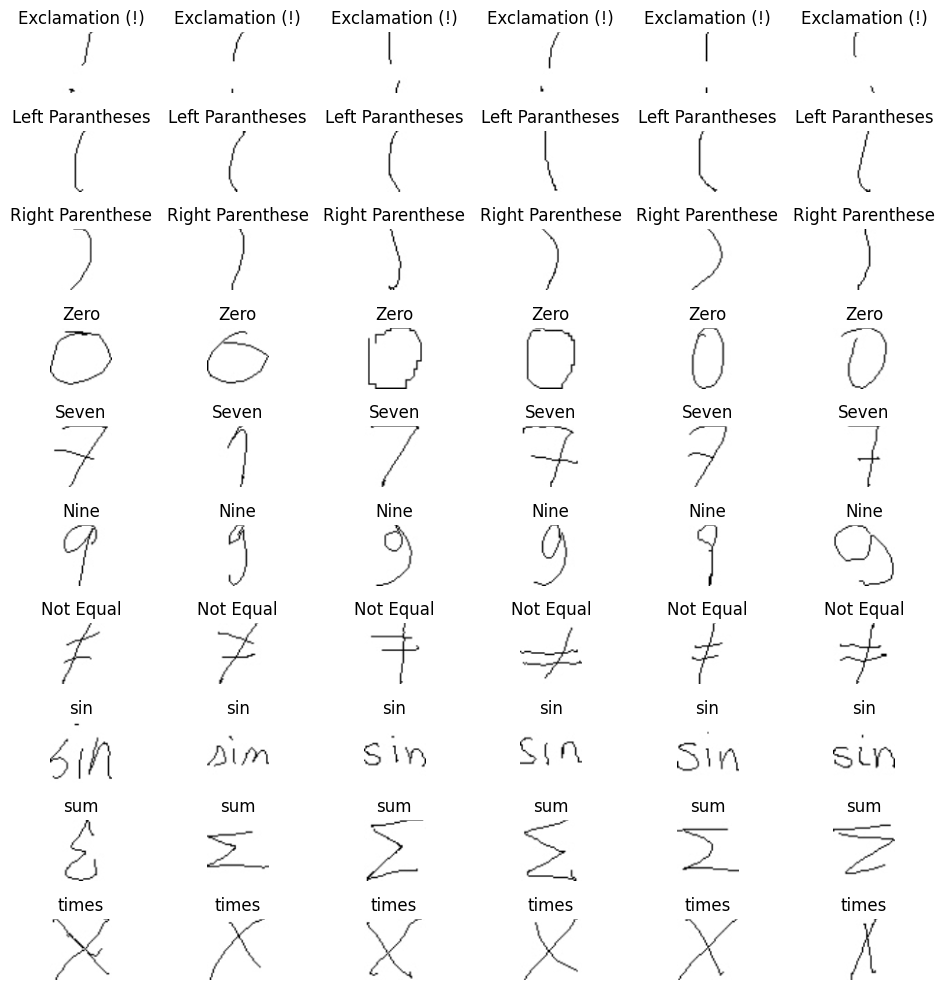

In [14]:
visualise_few_images_per_class(images, labels=labels, label_map=label_map, num_images_visualised_per_class=6)


## Data Partitioning
The dataset in split into training and testing sets. The random seed is set to 42 as per convention. For the experiment, the training data set will be will be 80 perecent of the images while the testing will be 20 perecent 

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
#Define X and y parts of the dataset
X = np.array(images)
y = np.array(labels)
test_size = 0.2
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_seed)



Investigate the shape of the data and their associated labels. The X values should be in 3 dimensions while the y values should be 1

In [16]:
print("The shape of the training data is ", X_train.shape)
print("The shape of the testing data is ", X_test.shape)
print("The shape of labels for the training set is ", y_train.shape)
print("The shape of labels for the testing set is ", y_test.shape)

The shape of the training data is  (4000, 64, 64)
The shape of the testing data is  (1000, 64, 64)
The shape of labels for the training set is  (4000,)
The shape of labels for the testing set is  (1000,)


Support Vector Machine from sklearn takes in data for up to 2D arrays, Given the data is currently in 3D. The X values must be flattened accordingly 

In [17]:
X_train = X_train.reshape(4000,-1)
X_test = X_test.reshape(1000, -1)

In [18]:
print("The shape of the training data after flattening is ", X_train.shape)
print("The shape of the testing data after flattening is ", X_test.shape)

The shape of the training data after flattening is  (4000, 4096)
The shape of the testing data after flattening is  (1000, 4096)


## Suport Vector Machine(SVM)

In [19]:
import sklearn as sk
from  sklearn import svm

model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)



SVC()

In [33]:
y_pred = model.predict(X_test)


### Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("ACCURACY is", accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred, output_dict=True)

ACCURACY is 0.986


In [35]:
def visualize_report(report):
    # Define custom colors
    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff', '#ffdfff', '#ffffdf']

    # Extracting metrics for each class
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Include class-specific metrics
    for cls, metrics_values in report.items():
        if cls.isdigit() or cls in ['macro avg', 'weighted avg']:
            labels.append(cls)
            for metric in metrics:
                data[metric].append(metrics_values.get(metric, None))

    # Convert data to DataFrame for easy plotting
    df = pd.DataFrame(data, index=labels)

    # Creating subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, metric in zip(axes, metrics[:-1]):  # Exclude 'support' for plotting
        sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()



C:\Users\61422\AppData\Local\Temp\ipykernel_30416\311617771.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
C:\Users\61422\AppData\Local\Temp\ipykernel_30416\311617771.py:23: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
C:\Users\61422\AppData\Local\Temp\ipykernel_30416\311617771.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
C:\Users\61422\AppData\Local\Temp\ipykernel_30416\311617771.py:23: UserWarning: 
The palette list has

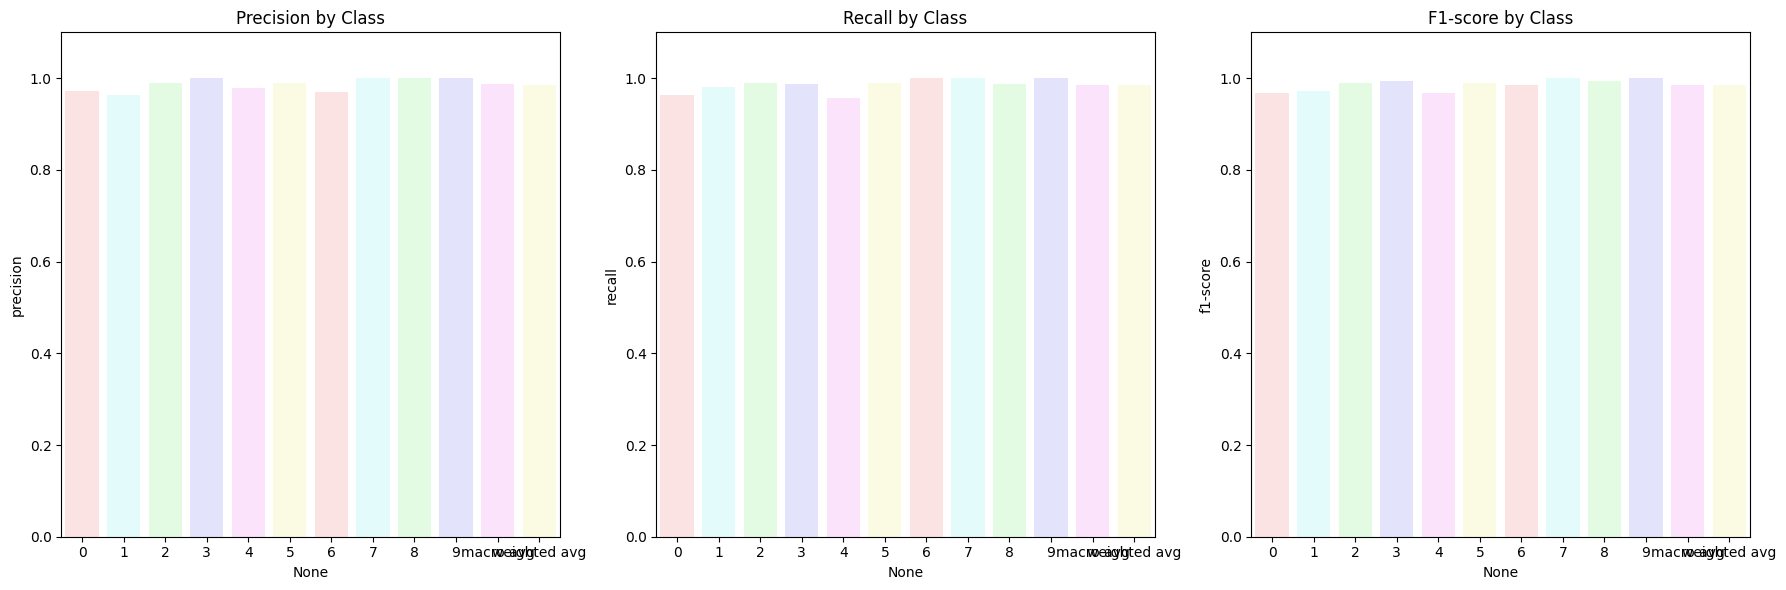

In [36]:
visualize_report(class_report)

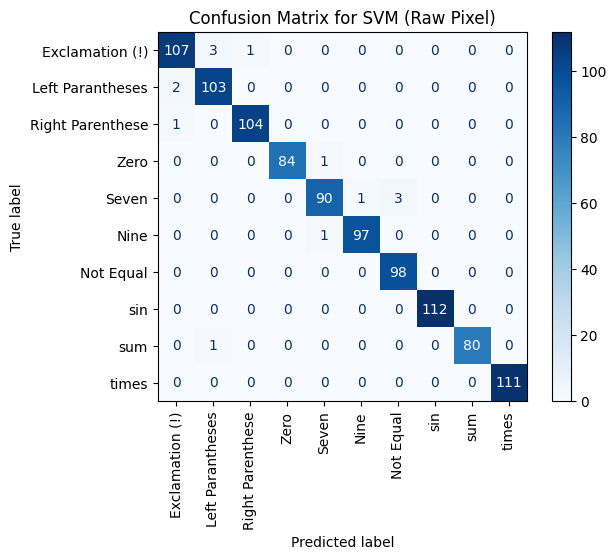

In [37]:
import matplotlib.pyplot as plt 

class_names = [label_map[i] for i in range(len(label_map))]
cm = confusion_matrix(y_test, y_pred)

matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (Raw Pixel)')
plt.xticks(rotation=90)
plt.show()

### Wrong classification

We will visualise the misclassified classes againts their true labels 

In [38]:
#Identify misclassified instances. this will return indisces in X_test
misclassified_indices = np.where(y_test!=y_pred)[0]
misclassified_indices

array([211, 230, 322, 393, 401, 420, 506, 514, 597, 615, 628, 692, 750,
       955])

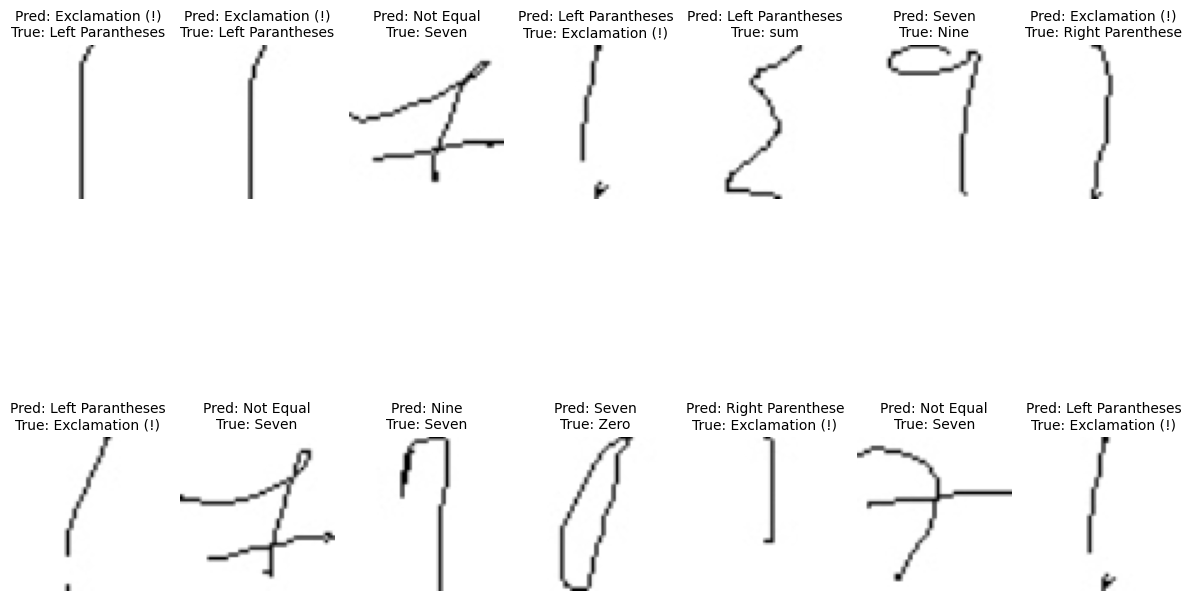

In [39]:
#Get the what aour model predicted for those indices
predicted_labels = [label_map[y_pred[i]] for i in misclassified_indices]
True_labels = [label_map[y_test[i]] for i in misclassified_indices]
True_Photos = [X_test[i] for i in misclassified_indices]

comparision = zip(predicted_labels, True_labels, True_Photos)


fig,axs = plt.subplots(2,7, figsize=(12,10))
axs = axs.flatten() # flatten into a 1D array

for idx, (predicted_label, true_label, True_Photo) in enumerate(comparision):
    #we want tp plot each photo with the title of each hoto being predicted label,true label
    axs[idx].imshow(True_Photo.reshape(64,64), cmap='gray')
    axs[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=10)

    axs[idx].axis('off')

plt.tight_layout()
plt.show()

## Artificial Neural Network(ANN)

### Creating And Training The model

Add all necessary import statements

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


The model consists of one input layer, two hidden layers and finally an output layer with softmax as the activation function in order to handle the 10 different classes in the dataset. 
* The learning rate is set at 0.001 

In [113]:
model = Sequential([
     Dense(512, activation='relu', input_shape=(4096,)),
     Dense(256, activation='relu'),
     Dense(64, activation='relu'),
     Dense(64, activation='relu'),
     Dense(10, activation='softmax')
])
from  tensorflow.keras.optimizers import Adam
optimizer= Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,250,250 (8.58 MB)

 Trainable params: 2,250,250 (8.58 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.2)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7847 - loss: 0.7635 - val_accuracy: 0.7362 - val_loss: 0.8617
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7891 - loss: 0.6468 - val_accuracy: 0.7188 - val_loss: 1.0813
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7403 - loss: 0.8624 - val_accuracy: 0.6587 - val_loss: 1.3035
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7363 - loss: 0.9643 - val_accuracy: 0.7475 - val_loss: 0.8301
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8247 - loss: 0.5520 - val_accuracy: 0.7113 - val_loss: 1.0049
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8048 - loss: 0.6129 - val_accuracy: 0.5225 - val_loss: 1.8488
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7315 - loss: 0.9162 - val_accuracy: 0.7825 - val_loss: 0.7966
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8140 - loss: 0.5766 - val_accuracy: 0.8313 - v

### Testing and Evaluating the model

In [116]:
predictions_prob = model.predict(X_test)
predictions_class = tf.argmax(predictions_prob, axis=1).numpy()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [117]:
result=np.argmax(predictions_prob,axis=1)

In [118]:
print("Classification Report:")
print(classification_report(y_test, predictions_class))

print("Accuracy:")
accuracy = accuracy_score(y_test, predictions_class)
print(accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       111
           1       0.95      0.89      0.92       105
           2       0.90      0.96      0.93       105
           3       0.89      0.95      0.92        85
           4       0.88      0.86      0.87        94
           5       0.96      0.84      0.90        98
           6       0.95      0.92      0.93        98
           7       0.99      0.95      0.97       112
           8       0.94      0.83      0.88        81
           9       0.83      0.91      0.87       111

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000

Accuracy:
0.906


In [ ]:
classification_report.

{'_skl_parameter_constraints': {'y_true': ['array-like', 'sparse matrix'],
  'y_pred': ['array-like', 'sparse matrix'],
  'labels': ['array-like', None],
  'target_names': ['array-like', None],
  'sample_weight': ['array-like', None],
  'digits': [<sklearn.utils._param_validation.Interval at 0x1bdd18e07c0>],
  'output_dict': ['boolean'],
  'zero_division': [<sklearn.utils._param_validation.Options at 0x1bdd18e0820>,
   'nan',
   <sklearn.utils._param_validation.StrOptions at 0x1bdd18e0790>]},
 '__wrapped__': <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>}

### Visualising Missclassifications 